In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
# Load the dataset
df = pd.read_csv("G:/My Drive/DSML raw files/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Data preprocessing

In [12]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop car_ID as it's just an identifier
df.drop('car_ID', axis=1, inplace=True)

# Handle categorical variables
categorical_cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
                   'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 
                   'fuelsystem']

# Label encoding for categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Split into features and target
X = df.drop('price', axis=1)
y = df['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Missing values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### Model Implementation

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

                         R2           MSE          MAE
Linear Regression  0.840707  1.257522e+07  2136.780473
Decision Tree      0.876518  9.748176e+06  2078.869927
Random Forest      0.955011  3.551630e+06  1311.467756
Gradient Boosting  0.921807  6.172836e+06  1732.049529
Support Vector    -0.100065  8.684358e+07  5696.072907


### Model evaluation

In [17]:
# Print evaluation metrics
print("Model Performance Comparison:")
print(results_df)

# Identify best model based on R2 score
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
print(f"\nBest performing model: {best_model_name} with R2 score: {results_df.loc[best_model_name, 'R2']:.4f}")

Model Performance Comparison:
                         R2           MSE          MAE
Linear Regression  0.840707  1.257522e+07  2136.780473
Decision Tree      0.876518  9.748176e+06  2078.869927
Random Forest      0.955011  3.551630e+06  1311.467756
Gradient Boosting  0.921807  6.172836e+06  1732.049529
Support Vector    -0.100065  8.684358e+07  5696.072907

Best performing model: Random Forest with R2 score: 0.9550


### Feature Importance Analysis


Top 10 Important Features:
       Feature  Importance
15  enginesize    0.554026
12  curbweight    0.289695
23  highwaympg    0.045507
20  horsepower    0.032247
1      CarName    0.018794
10    carwidth    0.012669
9    carlength    0.006999
8    wheelbase    0.006762
21     peakrpm    0.005359
22     citympg    0.004550


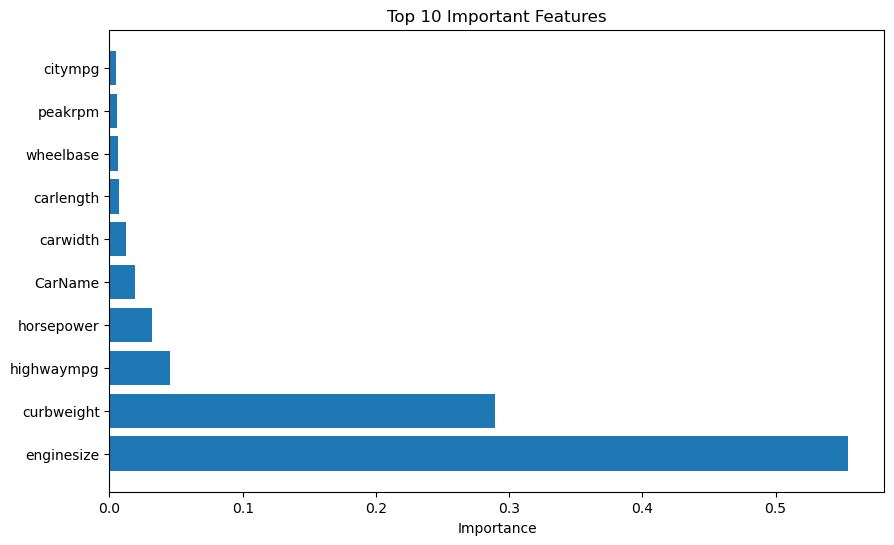

In [20]:
# Get feature importances from the best model (assuming it's Random Forest or Gradient Boosting)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    print("\nTop 10 Important Features:")
    print(feature_importance.head(10))
    
    # Plot feature importance
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
    plt.xlabel('Importance')
    plt.title('Top 10 Important Features')
    plt.show()

### Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest (adjust based on your best model)
if isinstance(best_model, RandomForestRegressor):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), 
                             param_grid, 
                             cv=5, 
                             scoring='r2',
                             n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    print("\nBest parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    
    # Evaluate on test set
    best_tuned_model = grid_search.best_estimator_
    y_pred_tuned = best_tuned_model.predict(X_test_scaled)
    
    print("\nTuned Model Performance:")
    print("R2:", r2_score(y_test, y_pred_tuned))
    print("MSE:", mean_squared_error(y_test, y_pred_tuned))
    print("MAE:", mean_absolute_error(y_test, y_pred_tuned))


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 score: 0.8961223601438064

Tuned Model Performance:
R2: 0.9558918823876597
MSE: 3482072.1577509926
MAE: 1306.1793821138212
